# Logistic Regression with scikit-learn

## Goal: Correctly classify a sample tumor as malignant or benign using the data in the the breast cancer wisconsin (diagnostic) dataset from scikit-learn [1].

### Logistic Regression:
Logistic regression is a model used to predict the probability of a sample being in a particular class or to classify a sample as being in a particular class. Its hypothesis function is
<center>$z = WX_{train} + B$ &emsp;&emsp;[Eq.1]</center>
<center>$h = f(z) = \frac{1}{1 + \exp^{-z}}$ &emsp;&emsp;[Eq.2]</center>
where $f(z) = P(positive|X_{train})$ is the vector of probabilities that a given sample is positive and f is the sigmoid, or the eponymous *logistic* function.

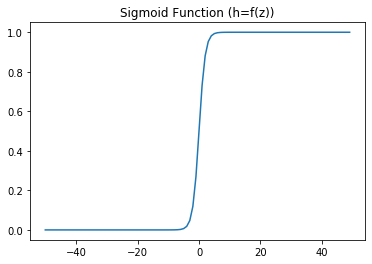

In [38]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-50, 50)
h = 1/(1+ np.exp(-z))
plt.plot(z, h)
plt.title("Sigmoid Function (h=f(z))")
plt.show()

Because the sigmoid function constrains its outputs to values only ranging between 0 and 1, it is suitable in most instances to view this output as a probability. Logistic regression can be used for classification purposes by designating a threshold value, often 0.5, over which the sample is labeled positive, and below which the sample is labeled negative.

### Step 1: Load the dataset
Since scikit-learn stores the dataset in its own library, we must import that data to train and test on.

In [39]:
from sklearn.datasets import load_breast_cancer
raw = load_breast_cancer()

X = raw.data
y = raw.target

#### Examine the dataset.
To get a better idea of the data we're dealing with, let's look at some informative aspects of the dataset.

In [40]:
# Show dataset description
print(raw.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [41]:
# Show feature names
features = list(raw.feature_names);
print("Number of features:", len(features))
print("All", len(features), "Features:\n" + str(features))

Number of features: 30
All 30 Features:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [42]:
# Show target/class label names
print("Class labels:", list(raw.target_names))

Class labels: ['malignant', 'benign']


In [43]:
# Show number of samples
print("Number of samples:", len(X))

Number of samples: 569


In [44]:
# Show dimension of X (the array of samples), e.g., (# of samples, # of features)
print("Dimension of X:", X.shape)

Dimension of X: (569, 30)


In [45]:
# Show dimension of y (the vector of predictions for each sample)
print("Dimension of y:", y.shape)

Dimension of y: (569,)


### Step 2: Split the data into training and test sets
To avoid overfitting the model to the data, which happens when the model is tested on the same data that it was trained on and causes decreased accuracy on unseen data (or, in other words, increased generalization error), we split the data such that a certain percentage is dedicated to training, and the rest is used for testing.

In [51]:
# Split X, y into X_train, X_test, y_train, y_test with 7:3 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

### Step 3: Fit the model to the training data using a logistic model
The logistic model class provided by scikit-learn has a solver attribute, which designates the optimization algorithm. The scikit-learn documentation recommends using the "liblinear" solver for smaller datasets (like the one used here). By default, the model uses L1 regularization (L1 meaning L1 norm, or the equation for the length of a vector).

In [52]:
# Build a logistic regression model of solver='liblinear' with X_train, y_train
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

### Step 4: Predict labels for the test data
In order to evaluate the performance of a trained model, it must be used on unseen data to predict target labels for each of the test samples.

In [53]:
# Predict y_pred from X_test
y_pred = model.predict(X_test)

In [54]:
# Show first ten predictions
print([raw.target_names[i] for i in y_pred[0:10]])

['benign', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'malignant', 'benign', 'benign', 'benign']


### Step 5: Measure the model's performance

In [15]:
# Show confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
confusion_matrix(y_test, y_pred)

array([[ 64,   5],
       [  2, 100]])

In [16]:
# Show accuracy
accuracy_score(y_test, y_pred)

0.9590643274853801

In [17]:
# Show precision
precision_score(y_test, y_pred)

0.9523809523809523

In [18]:
# Show recall
recall_score(y_test, y_pred)

0.9803921568627451

### Resources

1: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
<br>
2: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html